# Deep Learning - I. homework

Created by:
    name: Seres Zsombor,
    mail: zsombi9998@gmail.com,
    neptun: A93C8G

The assets for the following excercises are located in the assets folder.
For the better understanding of the code i used type hints, docstrings and some data classes.
Hope you enjoy the solutions! :)

## Excercise 1: Displaying images and creating histograms per color channels

### Installs and imports 

In [63]:
!pip install Pillow numpy opencv-python matplotlib pydantic

In [5]:
from PIL import Image
from PIL.PngImagePlugin import PngImageFile as PngImage
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from pydantic import BaseModel

import os
import glob
from typing import List,Dict,Optional,Tuple
from enum import Enum

### Helper structures

In [2]:
class RGBColorsEnum(Enum):
    """Enumeration to represent RGB color channels. 
        
        Numbering follows RGB ordering.
    
    """
    RED = 0
    GREEN = 1
    BLUE = 2
    
rgb_colors: List[RGBColorsEnum] = [rgb_color for rgb_color in RGBColorsEnum]

In [3]:
class StatisticInfo(BaseModel):
    """Model class to store expected value and deviation for an array.
    """
    
    expected_value: float
    deviation: float

### Loading images

To load and handle image files i used the Pillow library.

In [6]:
DEFAULT_IMAGES_DIR: str = 'assets/images'
DEFAULT_IMAGE_SIZE: Tuple[int] = (256,256)

def load_images(images_dir: str=DEFAULT_IMAGES_DIR,img_size=DEFAULT_IMAGE_SIZE)->Tuple[List[PngImage],List[str]]:
    """Loads images from files and saves titles.
    
        Also resizes images to uniformalize the result image list.
        
        Args:
            images_dir(str): Directory path which contains the images.
            img_size(Tuple[int]): The target image size after resizig.
            
        Returns:
            List[PngImage]: List of Pillow Png image file objects.
            List[str]: List of image titles.
        
    """
    
    img_titles: List[str] = []
    images: List[PngImage] = []
    
    for img_path in glob.iglob(f'{images_dir}/*'):
        if(img_path.endswith('.png')):
            img = Image.open(img_path).resize(img_size)
            images.append(img)

            title = img_path.replace('/','\\').replace('.','\\')
            title = title.split('\\')[-2]
            img_titles.append(title)
            
    return (images,img_titles)

In [7]:
images,img_titles = load_images()

### Displaying images

In [8]:
def display_images(images: List[PngImage]):
    """Displays the given images.
    
        Args:
            images(List[PngImage]): list of PngImage objects to display.
    """
    
    for image in images:
        display(image)

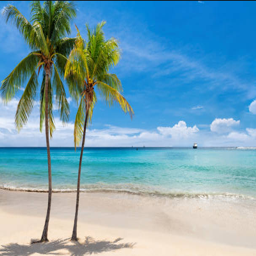

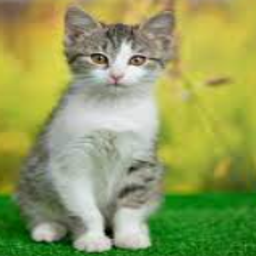

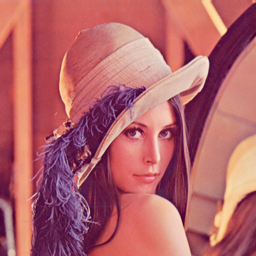

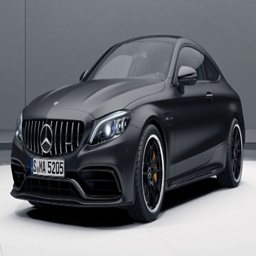

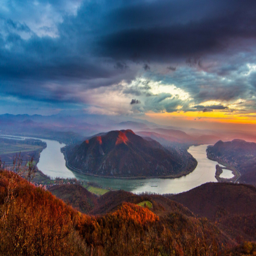

In [9]:
display_images(images)

### Converting images into ndarray

To create RGB histograms it is important to convert image objects into numpy arrays.
RGB images can be represented as 3 dimensional arrays. The dimensions are: height, width and color channels. Values of the array are between 0-255 (8bit). 

In [10]:
def convert_images(images=List[PngImage])->List[np.ndarray]:
    """Converts images into np.ndarray
    
        Args:
            images(List[PngImage]): list of images to convert.
        Returns:
            List[np.ndarray]: List of numpy representations of the given images.
    """
    img_arrays: List[np.ndarray] = []
    for image in images:
        img_arr = np.asarray(image)
        img_arrays.append(img_arr)
        
    return img_arrays

In [11]:
img_arrays = convert_images(images)

### Creating RGB histograms

In [12]:
def create_rgb_histogram(img_arr: np.ndarray, image_title: str):
    """Creates and displays RGB histograms.
    
        The histograms are created per channel, then displayed together.
        
        Args:
            img_arr(np.ndarray): numpy array represantation of src image
            image_title(str): title of the image, it will be displayed in the histogram title
    """
    plt.figure()
    plt.xlim([0, 256])
    for rgb_color in rgb_colors:
        histogram, bin_edges = np.histogram(
            img_arr[:, :, rgb_color.value], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=rgb_color.name.lower())

    plt.title(f"Color Histogram for image: {image_title}")
    plt.xlabel("Color value")
    plt.ylabel("Pixel count")

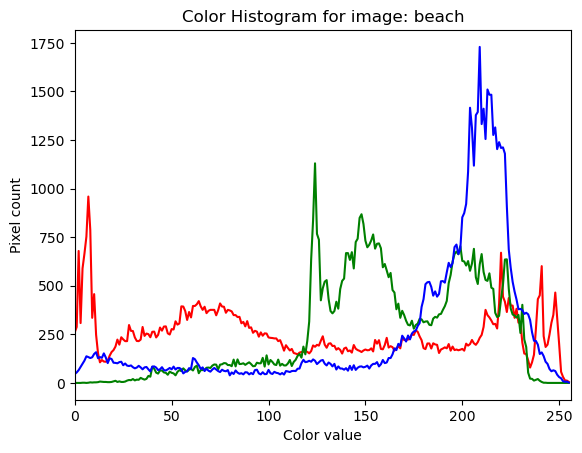

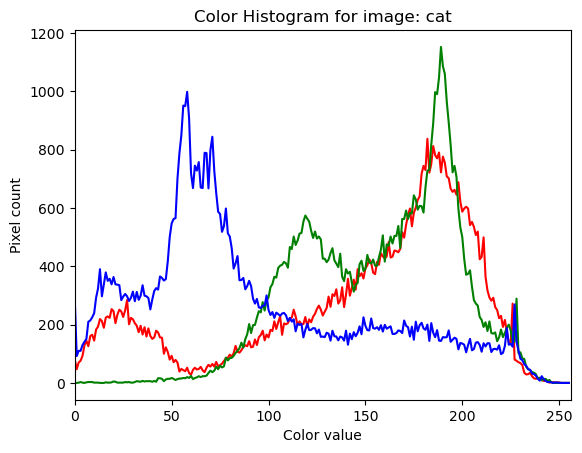

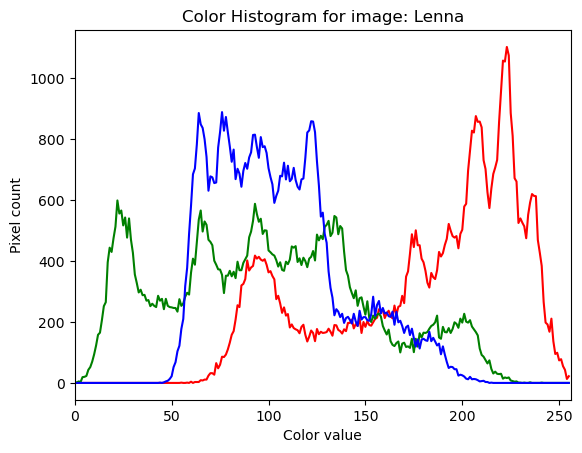

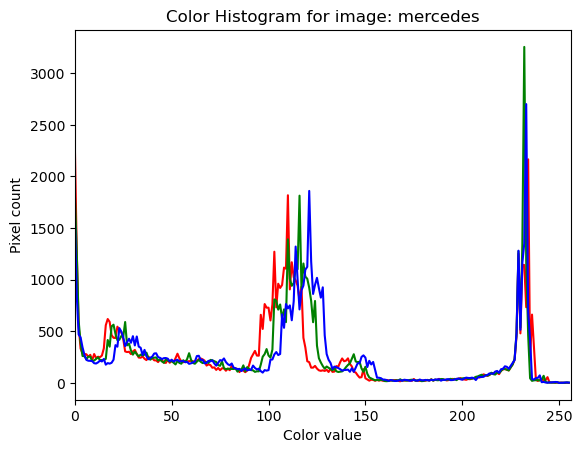

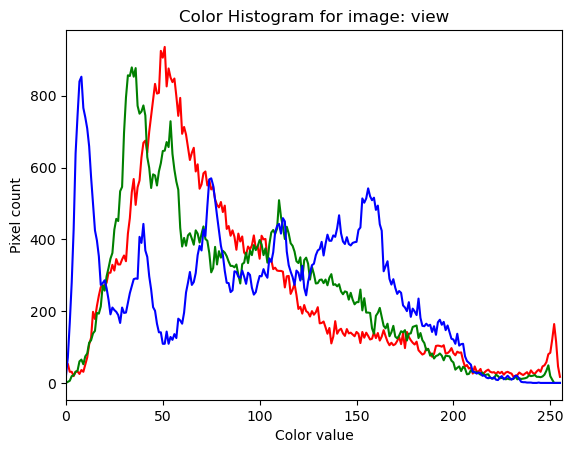

In [14]:
for idx in range(len(img_arrays)):
    create_rgb_histogram(img_arrays[idx],img_titles[idx])

## Excercise 2: Normalizing images

I normalize per picture per color channel, because each image and channel are individual. 

In [15]:
def calc_img_statistic_info(img_arr: np.ndarray)->Dict[RGBColorsEnum,StatisticInfo]:
    """Calculates expected value and std per color channel for an image.
    
        Args:
            img_arr: np.ndarray representation of an RGB image to calculate infos for.
            
        Returns:
            Dict[RGBColorsEnum,StatisticInfo]: The dict which holds exp.value 
                and std per color channels.
    """
    
    statistic_info_dict = {}
    for rgb_color in rgb_colors:
        channel = img_arr[:,:,rgb_color.value]
        channel_mean = np.mean(channel) # is the expected value because of uniform distribution
        channel_std = np.std(channel)
        
        statistic_info = StatisticInfo(expected_value=channel_mean,deviation=channel_std)
        statistic_info_dict[rgb_color] = statistic_info
    
    return statistic_info_dict

### Displaying expected value and deviation of images per color channels

In [16]:
def display_imgs_statistic_info(img_arrays: List[np.ndarray]):
    """Displays expected info and std per color channel.
    
        img_arrays(List[np.ndarray]): The target image np.ndarray
    """
    
    for idx in range(len(img_arrays)):
        print(f"{img_titles[idx]}:")
        img_statistic_info_dict = calc_img_statistic_info(img_arrays[idx])
        for channel in img_statistic_info_dict:
            stat_info = img_statistic_info_dict[channel]
            print(f"Channel {channel.name.lower()}:\n expected_value: {stat_info.expected_value} , deviation: {stat_info.deviation}")
        print()

In [17]:
display_imgs_statistic_info(img_arrays)

beach:
Channel red:
 expected_value: 118.8231201171875 , deviation: 77.27833502723306
Channel green:
 expected_value: 162.89364624023438 , deviation: 43.1710819932693
Channel blue:
 expected_value: 180.84849548339844 , deviation: 58.55162557554381

cat:
Channel red:
 expected_value: 146.49514770507812 , deviation: 60.06978623566587
Channel green:
 expected_value: 157.99717712402344 , deviation: 38.5876225679227
Channel blue:
 expected_value: 91.840576171875 , deviation: 58.610049079368586

Lenna:
Channel red:
 expected_value: 180.22994995117188 , deviation: 48.7661476434108
Channel green:
 expected_value: 99.05776977539062 , deviation: 52.35625015207865
Channel blue:
 expected_value: 105.411865234375 , deviation: 33.229546227972996

mercedes:
Channel red:
 expected_value: 101.79423522949219 , deviation: 72.15004061629114
Channel green:
 expected_value: 105.34765625 , deviation: 71.26928096694886
Channel blue:
 expected_value: 109.39244079589844 , deviation: 70.42574927190907

view:
Cha

### Normalizing image color channels

I normalized the color channels using the following formula:
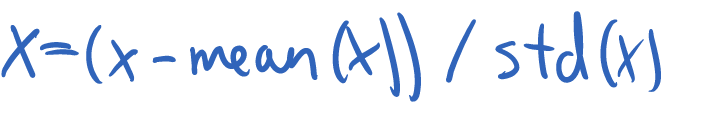

In [18]:
def norm_img_channels(img_arr: np.ndarray)->np.ndarray:
    """Normalises image per color channels.
    
        Args:
            img_arr(np.ndarray): target of the operation.
        Returns:
            np.ndarray: the normalized image np array.
    """
    
    img_statistic_info = calc_img_statistic_info(img_arr)
    normed_img_array: np.ndarray = np.ndarray(shape=img_arr.shape)
    
    def __normalize(value: float,expected_value: float, deviation: float)->float:
        return (value-expected_value)/deviation
        
    for rgb_color in rgb_colors:
        color_stat_info = img_statistic_info[rgb_color]
        flattened_channel = img_arr[:,:,rgb_color.value].flatten()
        normed_flattened_channel = [__normalize(pixel,color_stat_info.expected_value,color_stat_info.deviation) for pixel in flattened_channel]
        
        normed_img_array[:,:,rgb_color.value] = np.reshape(normed_flattened_channel,DEFAULT_IMAGE_SIZE)
        
    return normed_img_array

In [19]:
normed_img_arrays: List[np.ndarray] = []
normed_img_arrays = [norm_img_channels(img_arr) for img_arr in img_arrays]

### Checking normalization:

In [20]:
display_imgs_statistic_info(normed_img_arrays)

beach:
Channel red:
 expected_value: 2.7755575615628914e-17 , deviation: 1.0
Channel green:
 expected_value: -4.163336342344337e-17 , deviation: 1.0
Channel blue:
 expected_value: -3.469446951953614e-18 , deviation: 1.0

cat:
Channel red:
 expected_value: 2.7755575615628914e-17 , deviation: 1.0
Channel green:
 expected_value: 0.0 , deviation: 0.9999999999999999
Channel blue:
 expected_value: 0.0 , deviation: 1.0

Lenna:
Channel red:
 expected_value: -1.3877787807814457e-17 , deviation: 1.0
Channel green:
 expected_value: 1.0408340855860843e-17 , deviation: 1.0
Channel blue:
 expected_value: -4.163336342344337e-17 , deviation: 1.0

mercedes:
Channel red:
 expected_value: 0.0 , deviation: 0.9999999999999999
Channel green:
 expected_value: 0.0 , deviation: 1.0
Channel blue:
 expected_value: 0.0 , deviation: 0.9999999999999999

view:
Channel red:
 expected_value: -2.0816681711721685e-17 , deviation: 1.0
Channel green:
 expected_value: 2.7755575615628914e-17 , deviation: 0.9999999999999999


As the result shows the normalization was successfull. Minor deviations are caused by the mathematical accuracy limits of the computer.

## Excercise 3: Sound spectogram

Histograms are a way to visualize audio files. They can be shown in 2 dimensions, the two axis are time and frequency. However there is a 3rd dimension which is the "energy" at the given point, it be visualized using colors. To create a histogram i used the scipy library.

### Installs,imports

In [90]:
!pip install pydantic scipy

In [21]:
import glob
from pydantic import BaseModel
from typing import List
from scipy import signal
from scipy.io import wavfile
import numpy as np

### Helper structures

In [22]:
class Audio(BaseModel):
    """Data class to store information about an audio file."""
    title: str
    data: np.ndarray
    sr: int
    
    class Config:
        arbitrary_types_allowed = True

In [23]:
DEFAULT_SOUND_DIRECTORY: str = 'assets/sound'
def load_audio(directory:str=DEFAULT_SOUND_DIRECTORY)->List[Audio]:
    """Loads stereo audio files and converts them into mono, also saves some infos.
        
        Args:
            directory(str): the path to a directory which contains stereo wav files.
            
        Returns:
            List[Audio]: List of Audio objects
    """
    sounds = []
    
    for sound_path in glob.iglob(f'{directory}/*'):
        if(not(sound_path.endswith('.wav'))):
            continue
        
        sample_rate, samples = wavfile.read(sound_path)
        mono_samples = samples.sum(axis=1)/2.0

        title = sound_path.replace('/','\\').replace('.','\\')
        title = title.split('\\')[-2]

        audio = Audio(title=title,data=mono_samples,sr=sample_rate)
        sounds.append(audio)
            
    return sounds

In [24]:
def create_sound_spectograms(sounds:List[Audio])->List[np.ndarray]:
    """Creates and displays sound spectograms.
        
        Args:
            sounds(List[Audio]): target audio objects.
        Returns:
            List[np.ndarray]: list of spectograms for each given audio.
    """
    
    spectograms: List[np.ndarray] = []
    for sound in sounds:
        frequencies, times, spectrogram = signal.spectrogram(sound.data,sound.sr)
        plt.pcolormesh(times, frequencies, np.log(spectrogram))
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.title(f"Spectrogram of {sound.title}")
        plt.show()
        
        spectograms.append(spectrogram)
    
    return spectograms

C:\Users\Zsombi\AppData\Local\Temp\ipykernel_16936\2123814281.py:13: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram))


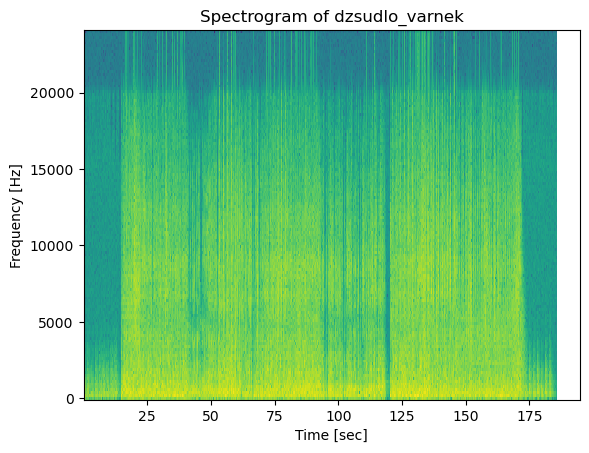

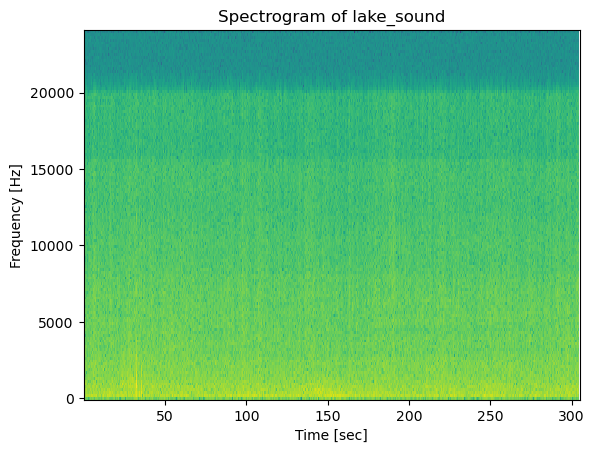

In [25]:
sounds = load_audio()
spectrograms=create_sound_spectograms(sounds)

## Excercise 4: Normalizing spectogram

I used the same formula as seen in ex2 to normalize spectogram, but in this case i used the mean and std of the whole spectogram.

In [26]:
def normalize_spectograms(spectrograms: List[np.ndarray])->List[np.ndarray]:
    """Normalizes the given spectogram list.
    
        Normalizes per spectogram.
        
        Args:
            spectograms(List[np.ndarray]): list of spectograms to normalie.
            
        Returns:
            List[np.ndarray]: list of normalized spectograms.
    
    """
    
    normalized_spectrograms: List[np.ndarray] = []
    
    for spectrogram in spectrograms:
        mean = np.mean(spectrogram)
        std = np.std(spectrogram)
        
        normalized_spectrogram = (spectrogram-mean)/std
        normalized_spectrograms.append(normalized_spectrogram)

    return normalized_spectrograms

### Checking mean and std

In [27]:
normalized_spectograms = normalize_spectograms(spectrograms)
for spectogram in normalized_spectograms:
    print(f"Mean: {np.mean(spectogram)} Std: {np.std(spectogram)}")

Mean: -1.0547393405642259e-17 Std: 1.0000000000000024
Mean: -5.267391746685515e-18 Std: 1.0


The operation was successful.

## 5-Character histogram

### Installs, imports

In [5]:
!pip install beautifulsoup4 matplotlib

In [34]:
from bs4 import BeautifulSoup,element as html_element
from typing import List
import urllib.request
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import re

### Function declarations

In [35]:
site_url: str = 'http://smartlab.tmit.bme.hu/oktatas-deep-learning'

In [36]:
DEFAULT_BLACKLISTED_HTML_ELEMENTS = ['style', 'script', 'head', 'title', 'meta', '[document]']

def html_to_text(body: bytes,blacklist: List[str]=DEFAULT_BLACKLISTED_HTML_ELEMENTS)->List[str]:
    """Gets the visible text from an html.
    
        Args:
            body(bytes): html body
            blacklist[List[str]]: html tags which are not considered as visible text.
            
        Returns:
            List[str]: Visible texts in the html.
    """
    def __is_visible(element: html_element, blacklist: List[str]):
        if element.parent.name in blacklist or isinstance(element,html_element.Comment):
            return False
        return True
    
    soup = BeautifulSoup(body, 'html.parser')
    html_text_elements = soup.findAll(text=True)
    
    visible_texts = [element.strip() for element in html_text_elements if __is_visible(element,blacklist)]  
    return visible_texts


In [37]:
def create_character_histogram(characters: List[str]):
    """Creates and displays a character histogram.
    
        Args:
            characters(List[str]): list of characters for the histogram.
    """
    counts = Counter(characters)
    labels, values = zip(*counts.items())
    indexes = np.arange(len(labels))
    bar_width = 0.1

    plt.bar(indexes, values)
    plt.xticks(indexes + bar_width, labels)
    plt.title("Character histogram")
    plt.show()

In [38]:
def text_to_characters(text_list: List[str])->List[str]:
    """Converts list of texts into a list of characters.
    
        Args:
            text_list(List[str]): list of visible text in the website.
            
        Returns:
            List[str]: list of characters.
    """
    full_text = "".join(text_list)
    full_text = re.sub("[^\w]", "",  full_text)
        
    return list(full_text)

### Solution

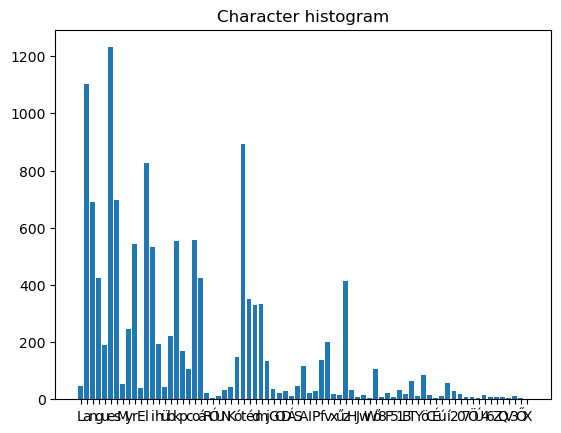

In [39]:
html = urllib.request.urlopen(site_url).read()
text_list = html_to_text(html)
characters = text_to_characters(text_list)
create_character_histogram(characters)